OBJECTIVE

 Aim is to identify patterns in traffic accident occurrences based on road conditions, weather, and time of day.

In [1]:
import pandas as pd
data1 = pd.read_csv('Accidents.csv')
data1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [2]:
data1.info

<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [3]:
data1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [4]:
data1.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [5]:
data1 = data1.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'])


In [6]:
data1 = data1.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition'])


In [9]:
data1['Description'] = data1['Description'].fillna('No Description')
data1['Street'] = data1['Street'].fillna('Unknown')
data1['City'] = data1['City'].fillna('Unknown')
data1['Zipcode'] = data1['Zipcode'].fillna('Unknown')
data1['Timezone'] = data1['Timezone'].fillna('Unknown')
data1['Airport_Code'] = data1['Airport_Code'].fillna('Unknown')
data1['Weather_Timestamp'] = data1['Weather_Timestamp'].fillna(method='ffill')
data1['Temperature(F)'] = data1['Temperature(F)'].fillna(data1['Temperature(F)'].mean())
data1['Humidity(%)'] = data1['Humidity(%)'].fillna(data1['Humidity(%)'].mean())
data1['Pressure(in)'] = data1['Pressure(in)'].fillna(data1['Pressure(in)'].mean())
data1['Visibility(mi)'] = data1['Visibility(mi)'].fillna(data1['Visibility(mi)'].mean())
data1['Wind_Direction'] = data1['Wind_Direction'].fillna('Calm')
data1['Wind_Speed(mph)'] = data1['Wind_Speed(mph)'].fillna(data1['Wind_Speed(mph)'].mean())
data1['Sunrise_Sunset'] = data1['Sunrise_Sunset'].fillna(method='ffill')
data1['Civil_Twilight'] = data1['Civil_Twilight'].fillna(method='ffill')
data1['Nautical_Twilight'] = data1['Nautical_Twilight'].fillna(method='ffill')
data1['Astronomical_Twilight'] = data1['Astronomical_Twilight'].fillna(method='ffill')


In [10]:
data1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [11]:
data1.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [12]:
data1.shape

(7554935, 42)

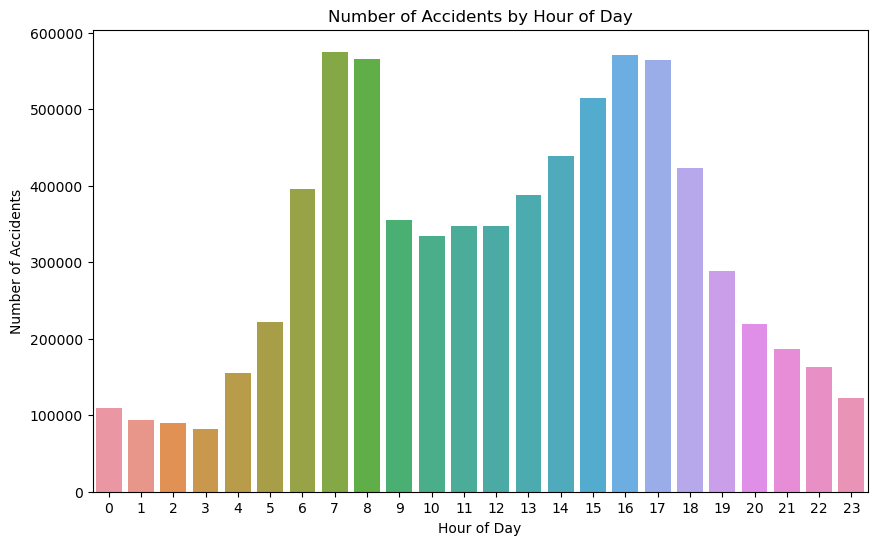

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data1['Start_Time'] = pd.to_datetime(data1['Start_Time'])
data1['End_Time'] = pd.to_datetime(data1['End_Time'])

data1['hour'] = data1['Start_Time'].dt.hour
data1['day_of_week'] = data1['Start_Time'].dt.dayofweek
data1['month'] = data1['Start_Time'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='hour')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

There are two clear peaks in the number of accidents throughout the day. The first peak occurs in the morning rush hour, between 6 am and 9 am. The second peak occurs in the evening rush hour, between 4 pm and 7 pm.
There is a general decrease in the number of accidents throughout the late night and early morning hours (between 10 pm and 5 am). This suggests that there are fewer vehicles on the road during these off-peak hours, leading to a lower risk of accidents.

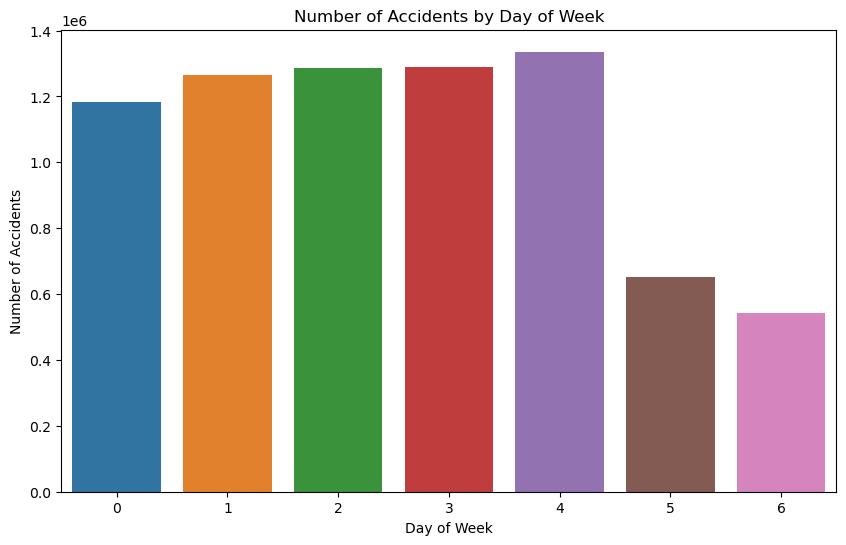

In [14]:
# Visualize the number of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='day_of_week')
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

The graph shows a clear dominance of accidents on weekdays (Monday through Friday) compared to weekends (Saturday and Sunday). This suggests that factors related to work commutes and daily activities  play a role in the higher frequency of accidents during weekdays.Saturday and Sunday see a significantly lower number of accidents compared to weekdays. This aligns with the decreased traffic volume typically observed during weekends.

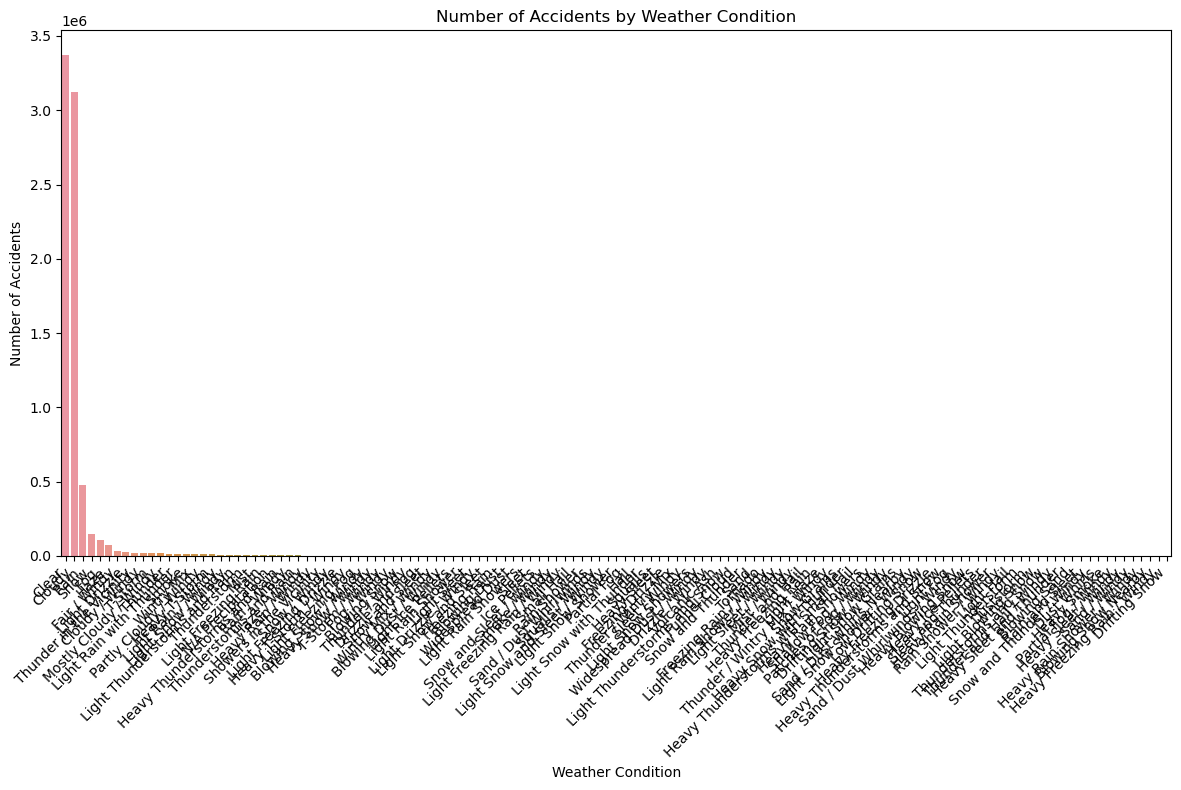

In [34]:
# Visualize the number of accidents by weather condition
weather_groups = {
    'Rain': ['Light Rain', 'Rain', 'Heavy Rain', 'Rain Showers', 'Drizzle', 'Heavy Drizzle'],
    'Snow': ['Light Snow', 'Snow', 'Heavy Snow', 'Snow Showers'],
    'Cloudy': ['Overcast', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds', 'Cloudy'],
    'Fog': ['Fog', 'Shallow Fog', 'Patches of Fog'],
    'Clear': ['Clear', 'Fair']
}

data1['Weather_Group'] = data1['Weather_Condition']
for group, conditions in weather_groups.items():
    data1.loc[data1['Weather_Condition'].isin(conditions), 'Weather_Group'] = group

weather_counts = data1['Weather_Group'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


During nighttime hours (roughly 10 PM to 6 AM), accident rates are generally lower across all weather conditions. This coincides with lower traffic volume at night.During daytime hours (roughly 6 AM to 10 PM), accident rates are generally higher. There's a clear peak in the total number of accidents around rush hour times (8 AM and 5 PM), regardless of weather condition. 
On days with fair weather, accident rates tend to follow the overall rush hour pattern, with peaks in the morning and evening commutes.On days with adverse weather conditions (rain, light rain with freezing rain, partly cloudy, light snow, and thunder), accident rates appear to be higher throughout the day, with a less distinct rush hour peak. This suggests that bad weather conditions can lead to more accidents even outside peak traffic times.

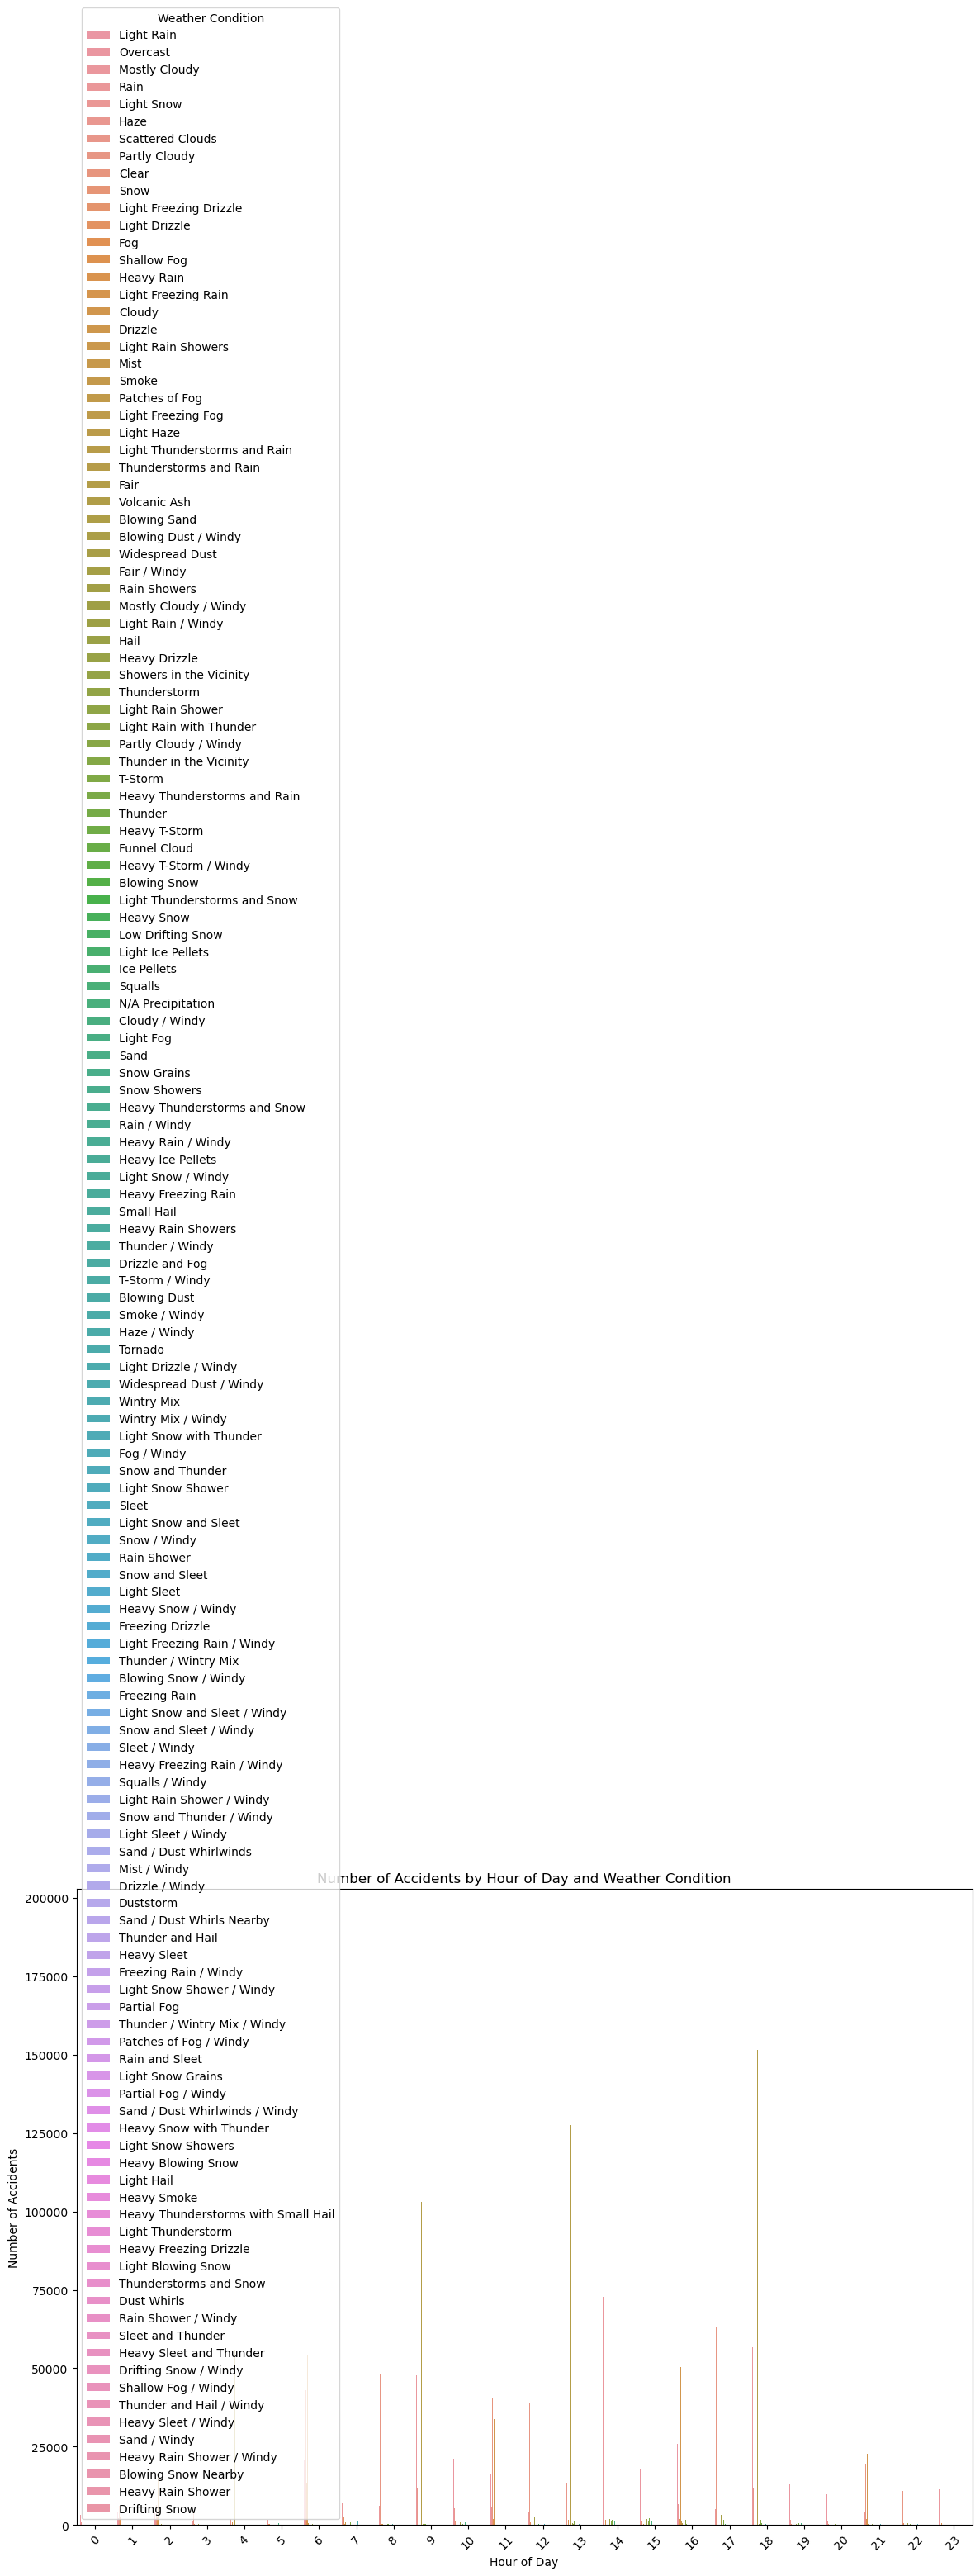

In [16]:
# Combine factors: Hour of day and Weather Condition
plt.figure(figsize=(14, 10))
sns.countplot(data=data1, x='hour', hue='Weather_Condition')
plt.title('Number of Accidents by Hour of Day and Weather Condition')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Condition')
plt.xticks(rotation=45)
plt.show()

The chart displays a count of traffic accidents grouped by different weather conditions and the hour of the day.The height of each bar represents the number of accidents for a specific weather condition at each hour.
- Light Rain appears to be one of the most common weather conditions for accidents, indicated by the relatively taller bars across multiple hours.Other frequent weather conditions include Overcast, Mostly Cloudy, and Rain, suggesting that cloudy and rainy conditions contribute significantly to the number of accidents.
- The distribution of accidents over the hours of the day shows distinct peaks around 8 AM and 5 PM, likely corresponding to rush hours when traffic volume is higher.There are also smaller peaks around 12 PM (noon) and 2 PM, which might correspond to midday traffic and school-related activities.
- Snow and Light Snow conditions show a pattern of causing accidents during the early hours of the morning (around 6 AM to 8 AM), possibly due to overnight accumulation and reduced visibility during dawn.


CONCLUSION

Impact of Weather Conditions:
Rainy and Cloudy Conditions: These conditions are significantly correlated with higher accident rates. Specifically, light rain, rain, and various forms of cloudy weather
Snowy and Foggy Conditions: Although less frequent than rainy conditions, snow and fog also pose substantial risks. 
Clear Weather conditions also show a high number of accidents, possibly due to higher traffic volumes.

Rush Hours: There are distinct peaks in accident occurrences during morning (around 8 AM) and evening (around 5 PM) rush hours. These times correlate with increased traffic density as people commute to and from work.
Midday Peaks: A smaller peak around midday (12 PM to 2 PM) suggests that lunchtime traffic and school-related activities also contribute to accident rates.

Winter Conditions: Snow and ice-related conditions predominantly cause accidents in the early morning hours (around 6 AM to 8 AM), likely due to overnight accumulation and reduced visibility during dawn.
Thunderstorms and Heavy Rain while less frequent, lead to spikes in accidents, highlighting the need for caution and preparedness during severe weather events.
Geographical Hotspots: he mapping of accidents indicates that certain areas are more prone to accidents, forming identifiable hotspots. These areas likely correspond to high-traffic zones, intersections, and regions with adverse road conditions.